<a href="https://colab.research.google.com/github/amiryarahmadi/M33/blob/main/M33_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
pola_chn3 = '/content/drive/MyDrive/M33/pa_sub3.fits'

pola_chn18 = '/content/drive/MyDrive/M33/pa_sub18.fits'

In [4]:
pola_3 = fits.open(pola_chn3)
pola_18 = fits.open(pola_chn18)


In [5]:
pola_3_map = pola_3[0].data
pola_18_map = pola_18[0].data

In [6]:
pola_3.close()
pola_18.close()

In [7]:
c = 3e8
f_1 = 4.99e9
lambda_1_sqr = (c/f_1)**2
f_2 = 7.6e9
lambda_2_sqr = (c/f_2)**2

In [8]:
print(lambda_1_sqr)

0.0036144433154886926


In [18]:
rm_map = (pola_3_map - pola_18_map)/(lambda_1_sqr - lambda_2_sqr)
RM = rm_map/57.29578

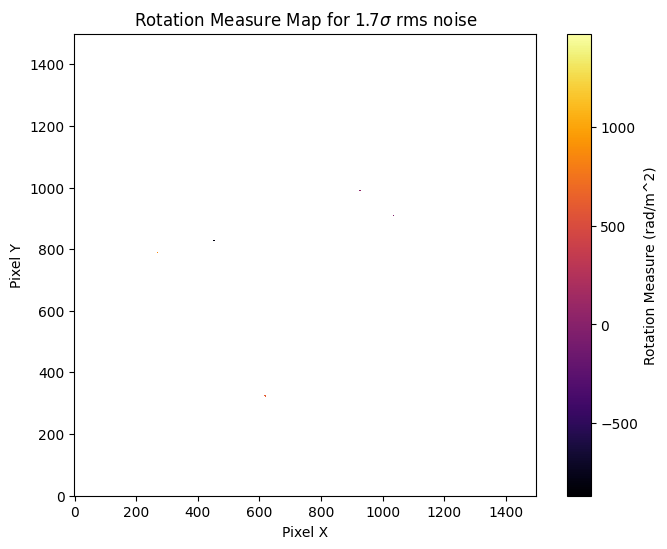

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(RM.squeeze(), origin='lower', cmap='inferno')
plt.colorbar(label='Rotation Measure (rad/m^2)')
plt.title('Rotation Measure Map for 1.7$\sigma$ rms noise')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

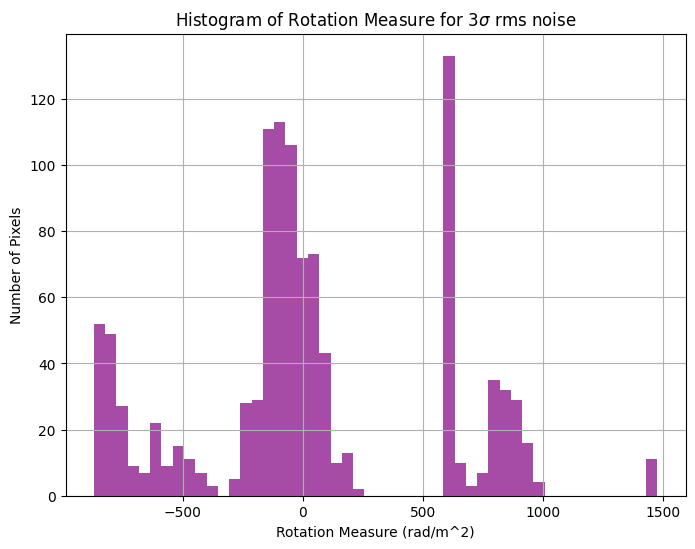

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the RM map to 1D array, removing masked or NaN values if any
rm_data = RM.flatten()
rm_data = rm_data[~np.isnan(rm_data)]  # Remove NaN values

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(rm_data, bins=50, color='purple', alpha=0.7)
plt.title('Histogram of Rotation Measure for 3$\sigma$ rms noise')
plt.xlabel('Rotation Measure (rad/m^2)')
plt.ylabel('Number of Pixels')
plt.grid(True)
plt.show()


In [12]:
rm_data

array([644.50903, 644.10864, 619.5686 , ..., 886.55835, 868.48584,
       851.93054], dtype=float32)

In [13]:
rm_data_prime = rm_data[(rm_data<500)&(rm_data>-350)]

(array([25.,  8.,  6., 23., 47., 84., 65., 39., 57., 57., 39., 34., 43.,
        30., 22.,  7.,  4.,  7.,  6.,  2.]),
 array([-328.93252563, -303.9375    , -278.94247437, -253.94746399,
        -228.95245361, -203.95742798, -178.9624176 , -153.96739197,
        -128.97238159, -103.97735596,  -78.98233795,  -53.98731995,
         -28.99230003,   -3.99728155,   20.99773788,   45.99275589,
          70.98777771,   95.98279572,  120.97781372,  145.9728241 ,
         170.96784973]),
 <BarContainer object of 20 artists>)

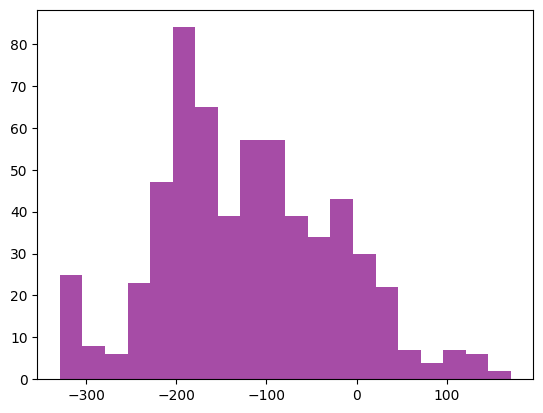

In [28]:
plt.hist(rm_data_prime, bins=20, color='purple', alpha=0.7)

In [17]:
np.median(rm_data_prime)

-60.400837

#RM with foreground correction

In [31]:
rm_map = (pola_3_map - pola_18_map)/(lambda_1_sqr - lambda_2_sqr)
RM = rm_map/57.29578
RM_cor = RM+65

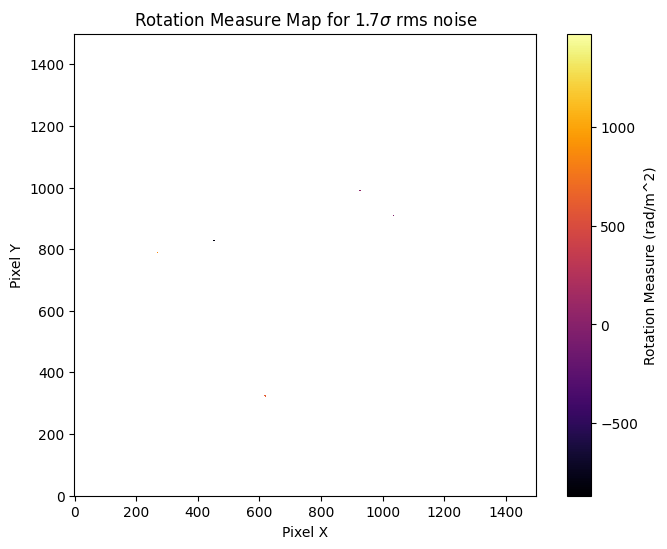

In [32]:
plt.figure(figsize=(8, 6))
plt.imshow(RM.squeeze(), origin='lower', cmap='inferno')
plt.colorbar(label='Rotation Measure (rad/m^2)')
plt.title('Rotation Measure Map for 1.7$\sigma$ rms noise')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

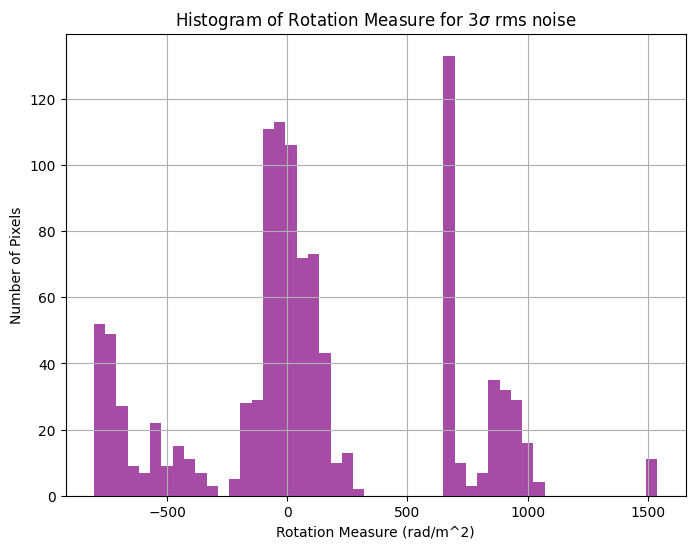

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the RM map to 1D array, removing masked or NaN values if any
rm_data = RM_cor.flatten()
rm_data = rm_data[~np.isnan(rm_data)]  # Remove NaN values

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(rm_data, bins=50, color='purple', alpha=0.7)
plt.title('Histogram of Rotation Measure for 3$\sigma$ rms noise')
plt.xlabel('Rotation Measure (rad/m^2)')
plt.ylabel('Number of Pixels')
plt.grid(True)
plt.show()

In [34]:
rm_data_prime = rm_data[(rm_data<500)&(rm_data>-350)]

(array([ 4.,  1.,  0.,  0., 18., 15.,  8., 40., 93., 89., 55., 80., 51.,
        46., 49., 32., 10.,  7., 10.,  2.]),
 array([-343.96768188, -311.72091675, -279.47412109, -247.22735596,
        -214.98057556, -182.73379517, -150.48703003, -118.24024963,
         -85.99347687,  -53.74670029,  -21.49992371,   10.74685192,
          42.99362946,   75.24040222,  107.48718262,  139.73396301,
         171.98072815,  204.22750854,  236.47428894,  268.72106934,
         300.96783447]),
 <BarContainer object of 20 artists>)

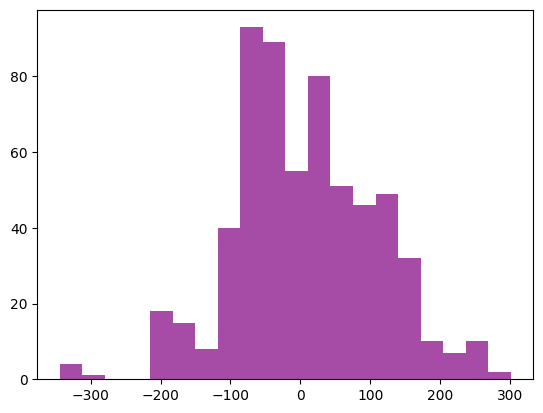

In [35]:
plt.hist(rm_data_prime, bins=20, color='purple', alpha=0.7)

In [36]:
np.median(rm_data_prime)

2.6974335

In [ ]:
phi_1 = 600*lambda_1_sqr*180/np.pi
print(phi_1)

124.25540836006464


In [ ]:
phi_2 = 600*lambda_2_sqr*180/np.pi
print(phi_2)

53.5659988522584


In [ ]:
print(np.min(RM))

nan


In [ ]:
# prompt: give me the shape of RM

print(RM.shape)
print(pola_3_map.shape)

In [ ]:
hdu = fits.PrimaryHDU(RM)
hdul = fits.HDUList([hdu])
hdul.writeto('rm_map.fits', overwrite=True)

##Extracting subcubes

In [ ]:
pip install astropy spectral-cube matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 kB 10.4 MB/s eta 0:00:00


##Separate Channels fo Q map

In [ ]:
from astropy.io import fits

# Load the FITS file
hdulist = fits.open('/content/drive/MyDrive/M33/M33Q_Mosaic.fits')

# Extract the data cube and header
data_cube = hdulist[0].data  # The data, usually a 3D or 4D array
header = hdulist[0].header   # The header, containing WCS info

# Print data shape to verify dimensions
print("Data shape:", data_cube.shape)

Data shape: (1, 18, 1500, 1500)


In [ ]:
# Remove the first axis if it's a singleton dimension (i.e., shape = (1, channels, height, width))
if len(data_cube.shape) == 4:
    data_cube = data_cube[0, :, :, :]  # Squeeze out the first dimension

# Extract channels 2 to 18
channels_2_to_18 = data_cube[1:18, :, :]  # Slice from channel 2 to 18 (inclusive of 2 but exclusive of 18)


In [ ]:
# List the generated files
fits_files = os.listdir(output_dir)
print(fits_files,new_header)

# Example of loading one of the extracted channels (e.g., channel_2.fits)
hdulist = fits.open(os.path.join(output_dir, 'channel_2.fits'))
image_data = hdulist[0].data
print("Channel 2 image data shape:", image_data.shape)


['channel_1016.fits', 'channel_1257.fits', 'channel_165.fits', 'channel_666.fits', 'channel_988.fits', 'channel_595.fits', 'channel_744.fits', 'channel_933.fits', 'channel_751.fits', 'channel_639.fits', 'channel_613.fits', 'channel_1368.fits', 'channel_1146.fits', 'channel_652.fits', 'channel_856.fits', 'channel_688.fits', 'channel_938.fits', 'channel_268.fits', 'channel_746.fits', 'channel_55.fits', 'channel_354.fits', 'channel_86.fits', 'channel_952.fits', 'channel_795.fits', 'channel_830.fits', 'channel_1083.fits', 'channel_240.fits', 'channel_233.fits', 'channel_657.fits', 'channel_577.fits', 'channel_358.fits', 'channel_404.fits', 'channel_1299.fits', 'channel_701.fits', 'channel_180.fits', 'channel_1440.fits', 'channel_977.fits', 'channel_797.fits', 'channel_332.fits', 'channel_847.fits', 'channel_42.fits', 'channel_205.fits', 'channel_1234.fits', 'channel_799.fits', 'channel_1006.fits', 'channel_510.fits', 'channel_573.fits', 'channel_535.fits', 'channel_1350.fits', 'channel_13.

In [ ]:
# List the generated files
fits_files = os.listdir(output_dir)
print(fits_files)

# Example of loading one of the extracted channels (e.g., channel_2.fits)
hdulist = fits.open(os.path.join(output_dir, 'channel_2.fits'))
image_data = hdulist[0].data
print("Channel 2 image data shape:", image_data.shape)


['channel_10.fits', 'channel_13.fits', 'channel_14.fits', 'channel_8.fits', 'channel_6.fits', 'channel_2.fits', 'channel_9.fits', 'channel_16.fits', 'channel_15.fits', 'channel_12.fits', 'channel_18.fits', 'channel_11.fits', 'channel_3.fits', 'channel_5.fits', 'channel_7.fits', 'channel_17.fits', 'channel_4.fits']
Channel 2 image data shape: (1500, 1500)


##Separate channles for U map

In [ ]:
from astropy.io import fits

# Load the FITS file
hdulist = fits.open('/content/drive/MyDrive/M33/M33U_Mosaic.fits')

# Extract the data cube and header
data_cube = hdulist[0].data  # The data, usually a 3D or 4D array
header = hdulist[0].header   # The header, containing WCS info

# Print data shape to verify dimensions
print("Data shape:", data_cube.shape)


Data shape: (1, 18, 1500, 1500)


In [ ]:
# Remove the first axis if it's a singleton dimension (i.e., shape = (1, channels, height, width))
if len(data_cube.shape) == 4:
    data_cube = data_cube[0, :, :, :]  # Squeeze out the first dimension

# Extract channels 2 to 18
channels_2_to_18 = data_cube[1:18, :, :]  # Slice from channel 2 to 18 (inclusive of 2 but exclusive of 18)

In [ ]:
import os

# Create a directory to store the single-channel FITS files
output_dir = 'single_channel_U_fits'
os.makedirs(output_dir, exist_ok=True)

# Loop over each channel from 2 to 18
for i in range(channels_2_to_18.shape[0]):
    # Extract single channel data (2D image)
    channel_data = channels_2_to_18[i, :, :]

    # Update the header to reflect the current channel
    new_header = header.copy()
    new_header['COMMENT'] = f'This is channel {i + 2} (index {i + 1})'

    # Create a new PrimaryHDU object with the single channel data and updated header
    hdu = fits.PrimaryHDU(data=channel_data, header=new_header)

    # Define the output filename based on the channel number
    output_filename = os.path.join(output_dir, f'channel_{i + 2}.fits')

    # Save the single-channel image to a new FITS file
    hdu.writeto(output_filename, overwrite=True)

    print(f'Saved channel {i + 2} to {output_filename}')

Saved channel 2 to single_channel_U_fits/channel_2.fits
Saved channel 3 to single_channel_U_fits/channel_3.fits
Saved channel 4 to single_channel_U_fits/channel_4.fits
Saved channel 5 to single_channel_U_fits/channel_5.fits
Saved channel 6 to single_channel_U_fits/channel_6.fits
Saved channel 7 to single_channel_U_fits/channel_7.fits
Saved channel 8 to single_channel_U_fits/channel_8.fits
Saved channel 9 to single_channel_U_fits/channel_9.fits
Saved channel 10 to single_channel_U_fits/channel_10.fits
Saved channel 11 to single_channel_U_fits/channel_11.fits
Saved channel 12 to single_channel_U_fits/channel_12.fits
Saved channel 13 to single_channel_U_fits/channel_13.fits
Saved channel 14 to single_channel_U_fits/channel_14.fits
Saved channel 15 to single_channel_U_fits/channel_15.fits
Saved channel 16 to single_channel_U_fits/channel_16.fits
Saved channel 17 to single_channel_U_fits/channel_17.fits
Saved channel 18 to single_channel_U_fits/channel_18.fits


Data shape: (1, 18, 1500, 1500)
Saved channel 0 to single_channel_Q_fits/channel_0.fits


Saved channel 1 to single_channel_Q_fits/channel_1.fits with frequency 5050360000.0 Hz
Saved channel 2 to single_channel_Q_fits/channel_2.fits with frequency 5178360000.0 Hz
Saved channel 3 to single_channel_Q_fits/channel_3.fits with frequency 5306360000.0 Hz
Saved channel 4 to single_channel_Q_fits/channel_4.fits with frequency 5434360000.0 Hz
Saved channel 5 to single_channel_Q_fits/channel_5.fits with frequency 5562360000.0 Hz
Saved channel 6 to single_channel_Q_fits/channel_6.fits with frequency 5690360000.0 Hz
Saved channel 7 to single_channel_Q_fits/channel_7.fits with frequency 5818360000.0 Hz
Saved channel 8 to single_channel_Q_fits/channel_8.fits with frequency 5946360000.0 Hz
Saved channel 9 to single_channel_Q_fits/channel_9.fits with frequency 6693370000.0 Hz
Saved channel 10 to single_channel_Q_fits/channel_10.fits with frequency 6821370000.0 Hz
Saved channel 11 to single_channel_Q_fits/channel_11.fits with frequency 6949370000.0 Hz
Saved channel 12 to single_channel_Q_fi

18

In [ ]:
from astropy.io import fits

# Load the FITS file
input_file = '/content/drive/MyDrive/M33/M33U_Mosaic.fits'
hdulist = fits.open(input_file)

# Extract the data cube and header
data_cube = hdulist[0].data  # The data, usually a 3D or 4D array
header = hdulist[0].header   # The header, containing WCS info

# Print data shape to verify dimensions
print("Original data shape:", data_cube.shape)

# Extract channels 2 to 18 (in Python indexing, channel 2 corresponds to index 1)
channels_2_to_18 = data_cube[1:18, :, :]  # Keep it as a 3D array

# Print the shape after slicing
print("Shape after slicing channels 2 to 18:", channels_2_to_18.shape)

# Optionally, you can add or modify headers here
header['NAXIS3'] = channels_2_to_18.shape[0]  # Update the number of channels in the header
header.add_record(('COMMENT', 'Extracted channels 2 to 18 from original data cube.'))

# Create a new FITS file with the extracted data
output_file = '/content/drive/MyDrive/M33/M33U_Mosaic_Channels_2_to_18.fits'
hdu = fits.PrimaryHDU(data=channels_2_to_18, header=header)

# Write to a new FITS file
hdu.writeto(output_file, overwrite=True)

# Close the original FITS file
hdulist.close()

print(f"Extracted channels saved to {output_file}")



Original data shape: (1, 18, 1500, 1500)
Shape after slicing channels 2 to 18: (0, 18, 1500, 1500)


AttributeError: 'Header' object has no attribute 'add_record'

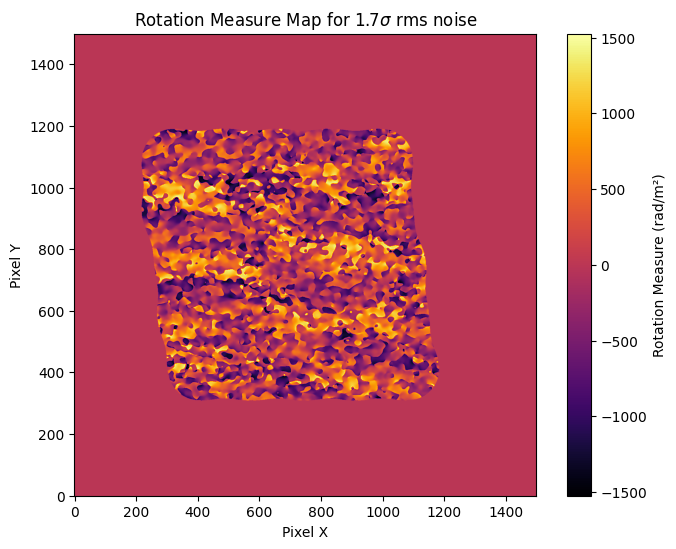

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Define the paths to the FITS files
pola_chn3 = '/content/drive/MyDrive/M33/pola3_3sigma.fits'
pola_chn18 = '/content/drive/MyDrive/M33/pola18_3sigma.fits'

# Load the polarization maps from FITS files
pola_3 = fits.open(pola_chn3)
pola_18 = fits.open(pola_chn18)
pola_3_map = pola_3[0].data
pola_18_map = pola_18[0].data
pola_3.close()
pola_18.close()

# Define constants
c = 3e8
f_1 = 4.99e9
lambda_1_sqr = (c / f_1) ** 2
f_2 = 7.6e9
lambda_2_sqr = (c / f_2) ** 2

# Calculate the RM map
rm_map = (pola_3_map - pola_18_map) / (lambda_1_sqr - lambda_2_sqr)
RM = rm_map / 57.29578

# Replace NaN values with zero (or any desired value)
RM[np.isnan(RM)] = 0  # Replace NaNs with 0

# Plot the RM map
plt.figure(figsize=(8, 6))
plt.imshow(RM, origin='lower', cmap='inferno')
plt.colorbar(label='Rotation Measure (rad/m²)')
plt.title('Rotation Measure Map for 1.7$\sigma$ rms noise')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()



In [ ]:
import numpy as np
from astropy.io import fits

# Open the original FITS file
with fits.open('/content/drive/MyDrive/M33/M33Q_Mosaic.fits') as hdul:
    # Loop through each HDU in the original FITS file
    for i in range(len(hdul)):
        hdu = hdul[i]

        # Create a new filename for each channel
        channel_Q = f'channel_{i}.fits'

        # Write the current HDU to a new FITS file, preserving its header
        hdu.writeto(channel_Q, overwrite=True)

In [ ]:
import os
import numpy as np
from astropy.io import fits

# Load the FITS file
input_fits_file = '/content/drive/MyDrive/M33/M33U_Mosaic.fits'
output_directory = '/content/drive/MyDrive/M33/single_U_channels'

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Open the FITS file
with fits.open(input_fits_file) as hdulist:
    data_cube = hdulist[0].data  # Load the data cube
    header = hdulist[0].header    # Get the header for later use

    # Print data shape to verify dimensions
    print("Data shape:", data_cube.shape)

    # Check if the first dimension is a singleton dimension and remove it if necessary
    if len(data_cube.shape) == 4:  # Shape is (1, channels, height, width)
        data_cube = data_cube[0, :, :, :]  # Remove the first dimension

    # Loop through each channel and save it as a separate FITS file
    for i in range(data_cube.shape[0]):
        channel_data = data_cube[i]  # Extract the i-th channel
        output_fits_file = os.path.join(output_directory, f'channel_{i + 1}.fits')

        # Create a new FITS file with the same header and the current channel data
        hdu = fits.PrimaryHDU(data=channel_data, header=header)
        hdu.writeto(output_fits_file, overwrite=True)

        print(f'Saved {output_fits_file}')

print("All channels have been successfully saved.")


Data shape: (1, 18, 1500, 1500)
Saved /content/drive/MyDrive/M33/single_U_channels/channel_1.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_2.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_3.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_4.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_5.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_6.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_7.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_8.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_9.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_10.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_11.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_12.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_13.fits
Saved /content/drive/MyDrive/M33/single_U_channels/channel_14.fits
Saved /content/drive/MyDrive/M33/single

In [ ]:
import os
import numpy as np
from astropy.io import fits

# Load the FITS file
input_fits_file = '/content/drive/MyDrive/M33/M33U_Mosaic.fits'
output_directory = '/content/drive/MyDrive/M33/single_channels'

# Define frequencies for each channel (make sure this matches the number of channels)
frequencies = [
    5.05036e9,  # Frequency for channel 1
    5.17836e9,  # Frequency for channel 2
    5.30636e9,  # Frequency for channel 3
    5.43436e9,  # Frequency for channel 4
    5.56236e9,  # Frequency for channel 5
    5.69036e9,  # Frequency for channel 6
    5.81836e9,  # Frequency for channel 7
    5.94636e9,  # Frequency for channel 8
    6.07436e9,  # Frequency for channel 9
    6.20236e9,  # Frequency for channel 10
    6.33036e9,  # Frequency for channel 11
    6.45836e9,  # Frequency for channel 12
    6.58636e9,  # Frequency for channel 13
    6.71436e9,  # Frequency for channel 14
    6.84236e9,  # Frequency for channel 15
    6.97036e9,  # Frequency for channel 16
    7.09836e9,  # Frequency for channel 17
    7.22636e9   # Frequency for channel 18
]

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Open the FITS file
with fits.open(input_fits_file) as hdulist:
    data_cube = hdulist[0].data  # Load the data cube
    header = hdulist[0].header    # Get the header for later use

    # Print data shape to verify dimensions
    print("Data shape:", data_cube.shape)

    # Check if the first dimension is a singleton dimension and remove it if necessary
    if len(data_cube.shape) == 4:  # Shape is (1, channels, height, width)
        data_cube = data_cube[0, :, :, :]  # Remove the first dimension

    # Loop through each channel and save it as a separate FITS file
    for i in range(data_cube.shape[0]):
        channel_data = data_cube[i]  # Extract the i-th channel
        output_fits_file = os.path.join(output_directory, f'channel_{i + 1}.fits')

        # Create a new FITS header and update it with frequency
        new_header = header.copy()  # Make a copy of the original header
        new_header['FREQ'] = (frequencies[i], 'Frequency for this channel (Hz)')  # Add frequency

        # Create a new FITS file with the current channel data and the updated header
        hdu = fits.PrimaryHDU(data=channel_data, header=new_header)
        hdu.writeto(output_fits_file, overwrite=True)

        print(f'Saved {output_fits_file}')

print("All channels have been successfully saved with frequency information.")


In [ ]:
import os
import numpy as np
from astropy.io import fits

# Load the FITS file
input_fits_file = '/content/drive/MyDrive/M33/M33U_Mosaic.fits'
output_directory = '/content/drive/MyDrive/M33/single_channels'

# Define frequencies for each channel (make sure this matches the number of channels)
frequencies = [
    5.05036e9,  # Frequency for channel 1
    5.17836e9,  # Frequency for channel 2
    5.30636e9,  # Frequency for channel 3
    5.43436e9,  # Frequency for channel 4
    5.56236e9,  # Frequency for channel 5
    5.69036e9,  # Frequency for channel 6
    5.81836e9,  # Frequency for channel 7
    5.94636e9,  # Frequency for channel 8
    6.07436e9,  # Frequency for channel 9
    6.20236e9,  # Frequency for channel 10
    6.33036e9,  # Frequency for channel 11
    6.45836e9,  # Frequency for channel 12
    6.58636e9,  # Frequency for channel 13
    6.71436e9,  # Frequency for channel 14
    6.84236e9,  # Frequency for channel 15
    6.97036e9,  # Frequency for channel 16
    7.09836e9,  # Frequency for channel 17
    7.22636e9   # Frequency for channel 18
]

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Open the FITS file
with fits.open(input_fits_file) as hdulist:
    data_cube = hdulist[0].data  # Load the data cube
    header = hdulist[0].header    # Get the header for later use

    # Print data shape to verify dimensions
    print("Data shape:", data_cube.shape)

    # Check if the first dimension is a singleton dimension and remove it if necessary
    if len(data_cube.shape) == 4:  # Shape is (1, channels, height, width)
        data_cube = data_cube[0, :, :, :]  # Remove the first dimension

    # Loop through each channel and save it as a separate FITS file
    for i in range(data_cube.shape[0]):
        channel_data = data_cube[i]  # Extract the i-th channel
        output_fits_file = os.path.join(output_directory, f'channel_{i + 1}.fits')

        # Create a new FITS header and update it with frequency
        new_header = header.copy()  # Make a copy of the original header
        new_header['FREQ'] = (frequencies[i], 'Frequency for this channel (Hz)')  # Add frequency

        # Create a new FITS file with the current channel data and the updated header
        hdu = fits.PrimaryHDU(data=channel_data, header=new_header)
        hdu.writeto(output_fits_file, overwrite=True)

        print(f'Saved {output_fits_file}')

print("All channels have been successfully saved with frequency information.")


Data shape: (1, 18, 1500, 1500)
Saved /content/drive/MyDrive/M33/single_channels/channel_1.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_2.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_3.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_4.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_5.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_6.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_7.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_8.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_9.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_10.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_11.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_12.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_13.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_14.fits
Saved /content/drive/MyDrive/M33/single_channels/channel_15.fits
Sa

In [ ]:
import os
import numpy as np
from astropy.io import fits

# Load the FITS file
input_fits_file = '/content/drive/MyDrive/M33/M33Q_Mosaic.fits'
output_directory = '/content/drive/MyDrive/M33/single_Q_channels'

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Open the FITS file
with fits.open(input_fits_file) as hdulist:
    data_cube = hdulist[0].data  # Load the data cube
    header = hdulist[0].header    # Get the header for later use

    # Print data shape to verify dimensions
    print("Data shape:", data_cube.shape)

    # Check if the first dimension is a singleton dimension and remove it if necessary
    if len(data_cube.shape) == 4:  # Shape is (1, channels, height, width)
        data_cube = data_cube[0, :, :, :]  # Remove the first dimension

    # Loop through each channel and save it as a separate FITS file
    for i in range(data_cube.shape[0]):
        channel_data = data_cube[i]  # Extract the i-th channel
        output_fits_file = os.path.join(output_directory, f'channel_{i + 1}.fits')

        # Create a new FITS file with the same header and the current channel data
        hdu = fits.PrimaryHDU(data=channel_data, header=header)
        hdu.writeto(output_fits_file, overwrite=True)

        print(f'Saved {output_fits_file}')

print("All channels have been successfully saved.")

Data shape: (1, 18, 1500, 1500)
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_1.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_2.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_3.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_4.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_5.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_6.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_7.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_8.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_9.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_10.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_11.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_12.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_13.fits
Saved /content/drive/MyDrive/M33/single_Q_channels/channel_14.fits
Saved /content/drive/MyDrive/M33/single

In [ ]:
from astropy.io import fits

# Open the FITS file in update mode
with fits.open('/content/drive/MyDrive/M33/single_Q_channels/channel_3.fits', mode='update') as hdul:
    # Access the header of the primary HDU
    header = hdul[0].header

    # Add WCS keywords for the frequency axis (CRVAL3, CDELT3, etc.)
    # Example: Adding a frequency of 1.42e9 Hz
    header['CTYPE3'] = 'SPECLNMF'
    header['CDELT3'] = 130e6                # Axis type: Frequency
    header['CRVAL3'] = 4.98736e9                 # Reference value in Hz (adjust as necessary)          # Increment per pixel (depends on your data)
    header['CRPIX3'] = 1                      # Reference pixel (adjust if needed)
    header['NAXIS3'] = 1
    hdul.flush()


IndentationError: unexpected indent (<ipython-input-5-6ebd5ca3efbf>, line 14)

#Split for Q

In [ ]:
from astropy.io import fits

import numpy as np

In [ ]:
filename = '/content/drive/MyDrive/M33/M33Q_Mosaic.fits'

In [ ]:
  original_header = hdul[0].header

In [ ]:
with fits.open(filename) as hdul:

  data = hdul[0].data  # Assuming the data is in the primary HDU

In [ ]:
print("Data shape:", data.shape)

Data shape: (1, 18, 1500, 1500)


In [ ]:

  subband = data[:, 17, :, :]

In [ ]:
sub_Q_18_hdu = fits.PrimaryHDU(subband)

In [ ]:
sub_Q_18_hdu.header.extend(original_header.cards)

In [ ]:
subband_hdu.header['SUBBAND'] = (2, 'Subband number')

In [ ]:
sub_Q_18 = f'sub_{2}_Q_18.fits'  # Naming the file

sub_Q_18_hdu.writeto(sub_Q_18, overwrite=True)

print(f"Created {sub_Q_18}")

Created sub_2_Q_18.fits


#Split for U

In [ ]:
from astropy.io import fits

import numpy as np

In [ ]:
filename = '/content/drive/MyDrive/M33/M33U_Mosaic.fits'

In [ ]:
  original_header = hdul[0].header

In [ ]:
with fits.open(filename) as hdul:

  data = hdul[0].data  # Assuming the data is in the primary HDU

In [ ]:
print("Data shape:", data.shape)

Data shape: (1, 18, 1500, 1500)


In [ ]:
  subband = data[:, 2, :, :]

In [ ]:
sub_U_2_hdu = fits.PrimaryHDU(subband)

In [ ]:
sub_U_2_hdu.header.extend(original_header.cards)

In [ ]:
subband_hdu.header['SUBBAND'] = (2, 'Subband number')

In [ ]:
sub_U_2 = f'sub_{2}_U_2.fits'  # Naming the file

sub_U_2_hdu.writeto(sub_U_2, overwrite=True)

print(f"Created {sub_U_2}")

Created sub_2_U_2.fits
